# Imports

In [3]:
# Usual imports
import numpy as np
import matplotlib.pyplot as plt

# Qiskit (check versions)
import qiskit
import qiskit_aer

print(f"Qiskit version {qiskit.__version__}")
print(f"Qiskit Aer version {qiskit_aer.__version__}")


# Quantum Circuits!
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

# General Imports
from qiskit.quantum_info import Statevector, Operator, SparsePauliOp, Pauli, DensityMatrix
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

# Noisy simulations
from qiskit_aer import AerSimulator
from qiskit_aer.noise import (
    NoiseModel,
    thermal_relaxation_error,
    amplitude_damping_error
)

Qiskit version 0.23.3
Qiskit Aer version 0.12.0


# Lesson 7

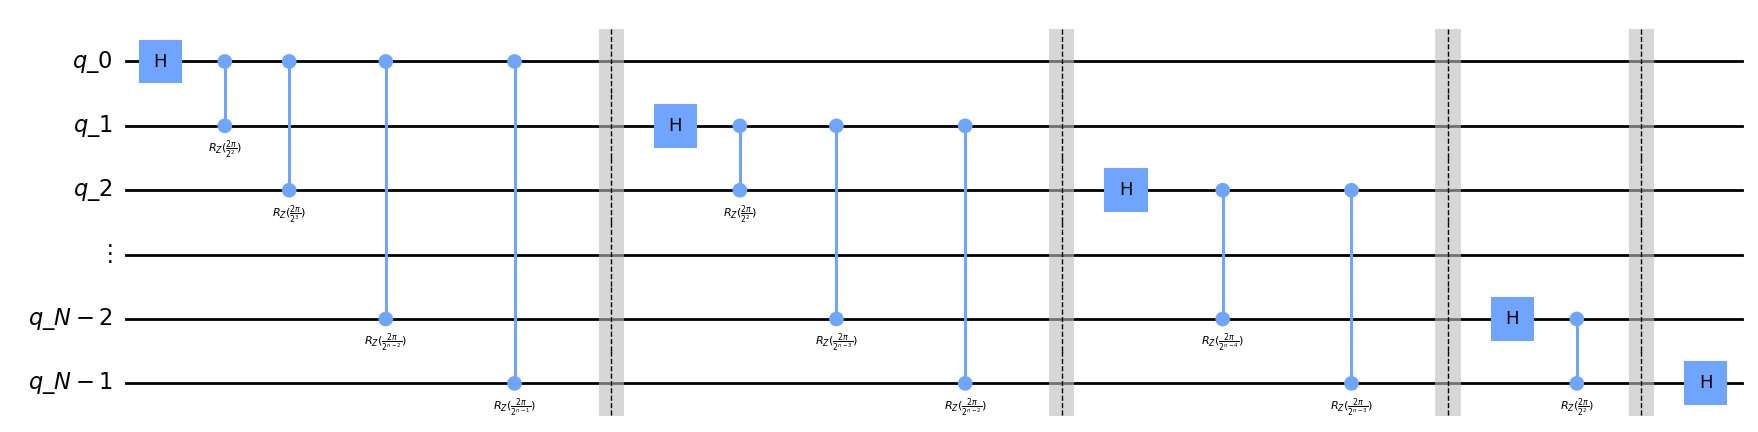

In [15]:
# Parameters
n = 6

labels = [f"q_{i}" for i in range(n)]
labels[n-3] = "\\vdots"
labels[n-2] = "q_{N-2}"
labels[n-1] = "q_{N-1}"

regs = [QuantumRegister(1, labels[i]) for i in range(6)]
qc = QuantumCircuit(*regs)

qc.h(0)
qc.cz(1, 0, label="$R_Z(\\frac{2\\pi}{2^2})$")
qc.cz(2, 0, label="$R_Z(\\frac{2\\pi}{2^3})$")
qc.cz(4, 0, label="$R_Z(\\frac{2\\pi}{2^{n-2}})$")
qc.cz(5, 0, label="$R_Z(\\frac{2\\pi}{2^{n-1}})$")
qc.barrier()

qc.h(1)
qc.cz(2, 1, label="$R_Z(\\frac{2\\pi}{2^2})$")
qc.cz(4, 1, label="$R_Z(\\frac{2\\pi}{2^{n-3}})$")
qc.cz(5, 1, label="$R_Z(\\frac{2\\pi}{2^{n-2}})$")
qc.barrier()

qc.h(2)
qc.cz(4, 2, label="$R_Z(\\frac{2\\pi}{2^{n-4}})$")
qc.cz(5, 2, label="$R_Z(\\frac{2\\pi}{2^{n-3}})$")
qc.barrier()

qc.h(4)
qc.cz(5, 4, label="$R_Z(\\frac{2\\pi}{2^2})$")
qc.barrier()

qc.h(5)


qc.draw("mpl")

In [ ]:
# Parameters
n = 6

qc = QuantumCircuit(n)

# Lesson 4

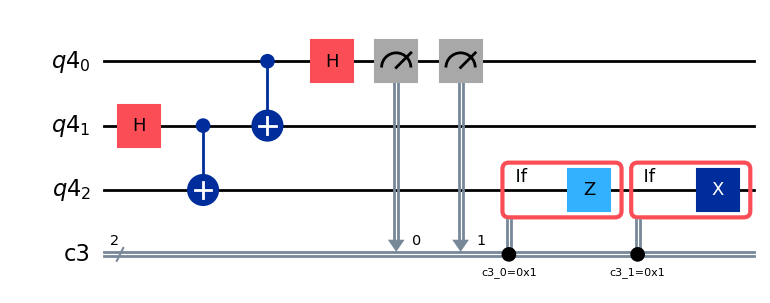

In [ ]:
# Build the registers
q = QuantumRegister(3)
c = ClassicalRegister(2)

# Unpack the bits
(c0,c1) = c

# Build the circuit
qc = QuantumCircuit(q, c)

qc.h(1)
qc.cx(1, 2)
qc.cx(0, 1)
qc.h(0)

qc.measure(0, 0)
qc.measure(0, 1)

with qc.if_test((c0, 1)):
    qc.z(2)
    
with qc.if_test((c1, 1)):
    qc.x(2)

qc.draw("mpl")